<a href="https://colab.research.google.com/github/mcrespo133/cd-2023-mauricio-crespo/blob/main/Taller_7_Regresi%C3%B3n_log%C3%ADstica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresión logística**

Al igual que la regresión lineal múltiple, la regresión logística es una técnica para comprobar hipótesis y relaciones. Tiene la caracteristica adicional de permitir una variable de respuesta de tipo categórica.


![DiferenciaRegresionLineal](https://miro.medium.com/max/640/0*gKOV65tvGfY8SMem.png)

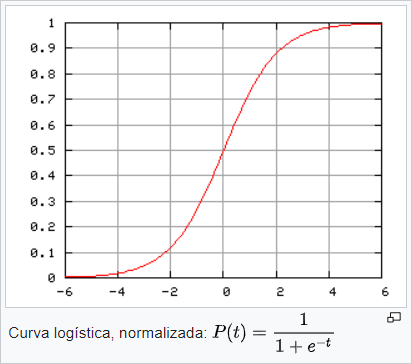

##**Base de datos del titanic**

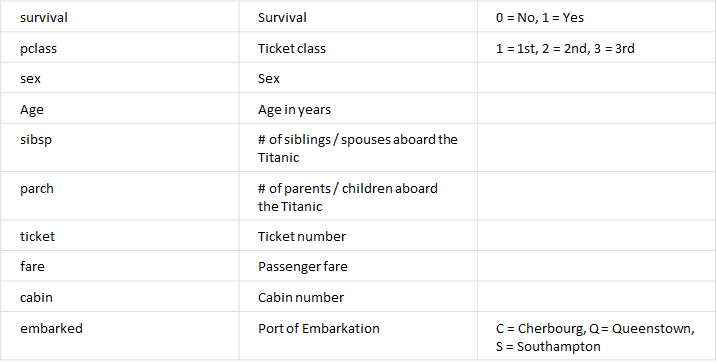


In [2]:
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Verificar nulos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.drop('Cabin', axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#**Modelo de regresión logística**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [8]:
x =  df.iloc[:,[5,6,7]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.665234
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                 0.01416
Time:                        14:10:13   Log-Likelihood:                -473.65
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                  0.001108
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0135      0.003     -5.273      0.000      -0.019      -0.008
SibSp         -0.1952      0.

¿Qué pasa si se incluye el sexo?

In [9]:
freq = df.groupby(['Sex']).count()
freq

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
Sex,,,,,,,,,,
female,259,259,259,259,259,259,259,259,259,259
male,453,453,453,453,453,453,453,453,453,453


In [10]:
df["Sex2"] = 0
df.Sex2.loc[df.Sex=="female"] = 1
df.Sex2.loc[df.Sex=="male"] = 0
df

<ipython-input-10-8d0d7571fd9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex2"] = 0
<ipython-input-10-8d0d7571fd9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="female"] = 1
<ipython-input-10-8d0d7571fd9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="male"] = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  Sex2         712 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 72.3+ KB


In [12]:
x =  df.iloc[:,[5,6,11]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530131
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.2144
Time:                        14:10:13   Log-Likelihood:                -377.45
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.855e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0334      0.003     -9.724      0.000      -0.040      -0.027
SibSp         -0.4542      0.

In [13]:
df.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
# Volver variable numerica el puerto de embarque y hacer de nuevo el modelo
# Tratar de descartar 2 variables para obtener mejor R2

In [16]:
# Verificamos las opciones listadas en la columna de Puerto de embarque
freq = df.groupby(['Embarked']).count()
freq

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Sex2
Embarked,,,,,,,,,,,
C,130,130,130,130,130,130,130,130,130,130,130
Q,28,28,28,28,28,28,28,28,28,28,28
S,554,554,554,554,554,554,554,554,554,554,554


In [17]:
# Añadir columna con valores numericos de Puerto de Embarque: S = 0, C = 1, Q = 2
df["Embarked2"] = 0
df.Embarked2.loc[df.Embarked=="S"] = 0
df.Embarked2.loc[df.Embarked=="C"] = 1
df.Embarked2.loc[df.Embarked=="Q"] = 2
df

<ipython-input-17-9a220d446a98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked2"] = 0
<ipython-input-17-9a220d446a98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked2.loc[df.Embarked=="S"] = 0
<ipython-input-17-9a220d446a98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked2.loc[df.Embarked=="C"] = 1
<ipython-input-17-9a220d446a98>:5: Settin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2,Embarked2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1,2
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1


In [18]:
# Se lista la info nuevamente por comodidad
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  Sex2         712 non-null    int64  
 12  Embarked2    712 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 77.9+ KB


In [19]:
# Se hace nuevamente el modelo incluyendo las variables 2 (Clase) y 12 (Puerto de Embarque):
x =  df.iloc[:,[2,5,6,7,11,12]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.473410
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.2984
Time:                        14:14:06   Log-Likelihood:                -337.07
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 6.993e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6281      0.076     -8.232      0.000      -0.778      -0.479
Age           -0.0058      0.

In [ ]:
# Se observa que las variables con P > |z| más altos son: Edad, Sib y especialmente Parch. Se contemplarán los 3 escenarios posibles quitando 2 de ellas.

In [20]:
# Quitando Edad y SibSp
x =  df.iloc[:,[2,7,11,12]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475817
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            3
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.2949
Time:                        14:16:29   Log-Likelihood:                -338.78
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 4.009e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.7095      0.058    -12.143      0.000      -0.824      -0.595
Parch         -0.0527      0.

In [21]:
# Quitando Edad y ParCh
x =  df.iloc[:,[2,6,11,12]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.474547
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            3
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.2968
Time:                        14:16:59   Log-Likelihood:                -337.88
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.628e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6898      0.059    -11.622      0.000      -0.806      -0.573
SibSp         -0.1550      0.

In [22]:
# Quitando SibSp y Parch
x =  df.iloc[:,[2,5,11,12]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475099
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            3
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.2959
Time:                        14:17:38   Log-Likelihood:                -338.27
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 2.408e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6642      0.073     -9.142      0.000      -0.807      -0.522
Age           -0.0051      0.

In [23]:
# Quitando las 3
x =  df.iloc[:,[2,11,12]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475984
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.2946
Time:                        14:18:01   Log-Likelihood:                -338.90
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 3.350e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.7158      0.057    -12.535      0.000      -0.828      -0.604
Sex2           2.6039      0.

In [24]:
# Quitando solamente la variable Parch
x =  df.iloc[:,[2,5,6,11,12]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.473410
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.2984
Time:                        14:19:51   Log-Likelihood:                -337.07
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 7.737e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6281      0.076     -8.266      0.000      -0.777      -0.479
Age           -0.0058      0.

*Conclusión: El mayor valor de R cuadrado obtenido es 0.2984, y se obtuvo en dos ocasiones:*

*   *1) Con todas las variables*
*   *2) Quitando la variable ParCh del modelo*

*Notas: Las variables más importantes son: PClass y Sex2, cuando se hace el modelo sin alguna de estas 2, R cuadrado disminuye considerablemente.*